Data loaded. Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   


C:\Users\yoga\AppData\Local\Temp\ipykernel_23404\3127830500.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_df[col].fillna(credit_df[col].median(), inplace=True)
C:\Users\yoga\AppData\Local\Temp\ipykernel_23404\3127830500.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

Shape after dropping duplicates: (283726, 31)
Class distribution:
 Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


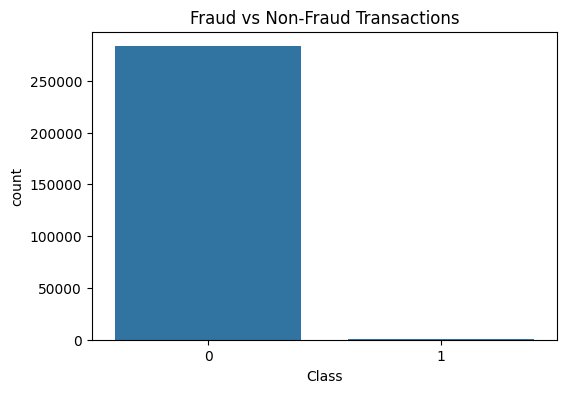

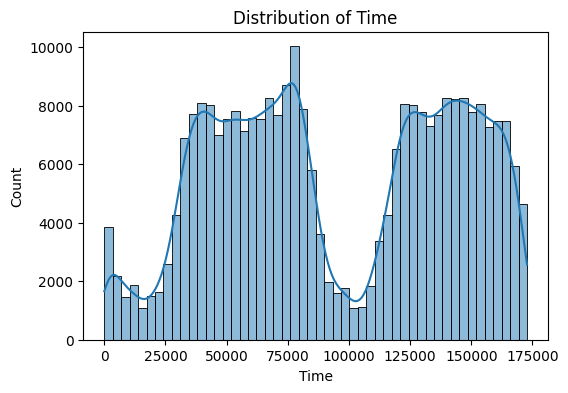

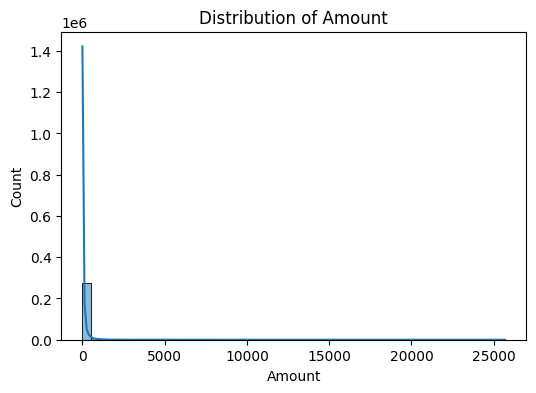

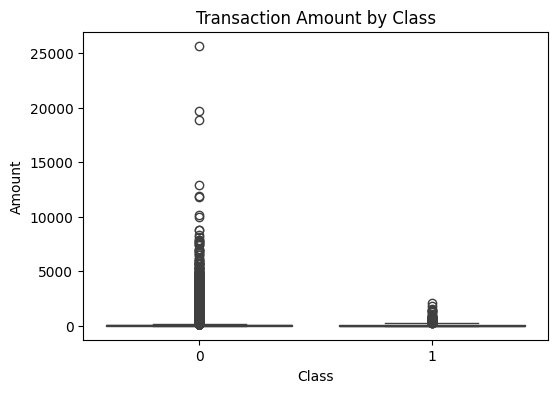

Before SMOTE:
 Class
0    226602
1       378
Name: count, dtype: int64
After SMOTE:
 Class
0    226602
1    226602
Name: count, dtype: int64
Processed dataset saved to ../data/processed/CreditCard_Processed.csv


In [ ]:
# ===================================================
# Task 1a: Data Cleaning and Exploratory Data Analysis for Credit Card Dataset
# ===================================================

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# ===================================================
# Step 1: Load Data
# ===================================================
credit_df = pd.read_csv("../data/raw/creditcard.csv")
print("Data loaded. Shape:", credit_df.shape)
print(credit_df.head())

# ===================================================
# Step 2: Data Cleaning
# ===================================================

# Replace empty strings with NaN
credit_df.replace("", np.nan, inplace=True)

# Check missing values
print("Missing values per column:\n", credit_df.isna().sum())

# Impute numeric missing values with median
for col in credit_df.select_dtypes(include=np.number).columns:
    credit_df[col].fillna(credit_df[col].median(), inplace=True)

# Drop duplicates
credit_df.drop_duplicates(inplace=True)
print("Shape after dropping duplicates:", credit_df.shape)

# Correct data types
credit_df['Time'] = credit_df['Time'].astype(float)
credit_df['Amount'] = credit_df['Amount'].astype(float)

# ===================================================
# Step 3: Exploratory Data Analysis (EDA)
# ===================================================

# --- Class Distribution ---
print("Class distribution:\n", credit_df['Class'].value_counts(normalize=True))
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=credit_df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

# --- Univariate Analysis: Numeric Features ---
numeric_cols = ['Time', 'Amount']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(credit_df[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
    plt.show()

# --- Bivariate Analysis: Amount vs Class ---
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=credit_df)
plt.title("Transaction Amount by Class")
plt.show()

# ===================================================
# Step 4: Feature Engineering
# ===================================================

# Create time-based features
# Hour of the day (0-23)
credit_df['hour_of_day'] = (credit_df['Time'] // 3600) % 24
# Day of the week (0-6)
credit_df['day_of_week'] = (credit_df['Time'] // (3600*24)) % 7

# ===================================================
# Step 5: Data Transformation
# ===================================================

# Standardize numeric features
scaler = StandardScaler()
credit_df[['Time', 'Amount']] = scaler.fit_transform(credit_df[['Time', 'Amount']])

# ===================================================
# Step 6: Handle Class Imbalance
# ===================================================

# Separate features and target
X = credit_df.drop(columns=['Class'])
y = credit_df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_res.value_counts())

# ===================================================
# Step 7: Save Cleaned & Processed Dataset
# ===================================================
credit_df.to_csv("../data/processed/CreditCard_Processed.csv", index=False)
print("Processed dataset saved to ../data/processed/CreditCard_Processed.csv")

# ===================================================
# END OF SCRIPT
w# ===================================================
